In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#Exercise 2 

#a)
import pandas as pd 

#b)
index = pd.period_range(start='1950-01-01', end='2018-12-31', freq='D')
D_avg = pd.Series([1]*len(index),index)
dt = 1.0/365.0
S0 = 1
mu = 0.06
sigma = 0.2
rand = np.random.randn(len(index))
D_avg.update(pd.Series(S0*np.exp(np.cumsum((mu-sigma**2/2)*dt+sigma*rand*np.sqrt(dt))), index=index))

the lenght is 25202


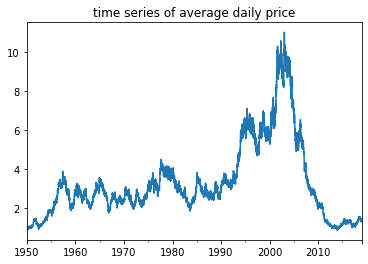

In [3]:
#c)
print('the lenght is %d' % len(D_avg)) 
D_avg.plot(title = 'time series of average daily price') 

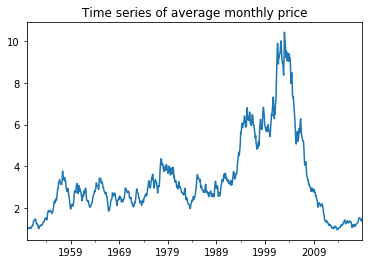

In [4]:
#d) e)
M_avg=D_avg.resample('M').mean()
M_avg.plot(title = 'Time series of average monthly price')

Daily 
Summary statistics:
count    25202.000000
mean         3.315202
std          1.969167
min          0.899213
25%          2.174071
50%          2.812019
75%          3.655062
max         10.999899
dtype: float64

There are 25202 values

annaualized mean = 0.0056044 
annualized standard deviation = 0.1987747. 


Weekly 
Summary statistics:
count    3602.000000
mean        3.314764
std         1.969336
min         0.906433
25%         2.172407
50%         2.805428
75%         3.665538
max        10.925235
dtype: float64

There are 3602 values

annaualized mean = 0.0055877 
annualized standard deviation = 0.2002486. 


Monthly 
Summary statistics:
count    828.000000
mean       3.313142
std        1.971867
min        0.929069
25%        2.174089
50%        2.804379
75%        3.650151
max       10.373520
dtype: float64

There are 828 values

annaualized mean = 0.0050958 
annualized standard deviation = 0.1936987. 




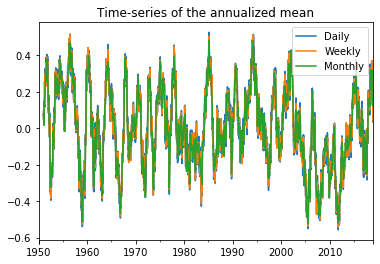

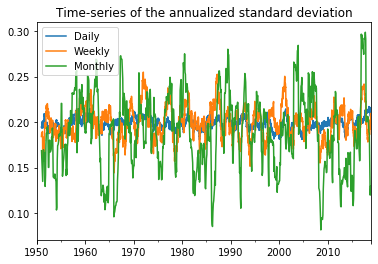

In [16]:
#Exrcise 3 

freq = ['D','W','M'] #frequency
desc_freq = ['Daily','Weekly','Monthly'] #Description for plots
yearly_freq = [365,52,12]

for f in freq:
    i = freq.index(f) #position

    #a)
    resam = D_avg.resample(f,convention = 'start').first()
    logret = np.log(resam/resam.shift(1))

    #b)
    f_stat = resam.describe() 
    print( '%s \nSummary statistics:' % desc_freq[i])
    print(f_stat)
    print( '\nThere are %d values' % len(resam))

    #c)
    f_annualized_mean = np.mean(logret)*yearly_freq[i]
    f_annualized_std = np.std(logret)*np.sqrt(yearly_freq[i])
    print( '\nannaualized mean = %.7f \nannualized standard deviation = %.7f. \n\n'  % (f_annualized_mean,f_annualized_std)) 

    #d mean
    plt.figure(0)
    (logret.rolling(yearly_freq[i]).mean()*yearly_freq[i]).plot(label=desc_freq[i])
    plt.title('Time-series of the annualized mean')
    plt.legend()

    #d std
    plt.figure(1)
    (logret.rolling(yearly_freq[i]).std()*np.sqrt(yearly_freq[i])).plot(label=desc_freq[i])
    plt.title('Time-series of the annualized standard deviation')
    plt.legend()

e)
Annualized mean is similar for different frequences. Regarding standard deviation, we notice that, even changing the frequence, we always get a quite noisy estimation. Therefore, it is evident that changing frequence is not a good way to improve the estimation. It is known that to improve our estimation we should use a larger sampler (increase the observations). However increasing the frequence the noise is reduced. In conclusion, changes in frequence do not bring any relevant contributions in terms of mean, but a daily frequence helps to reduce the noise 

